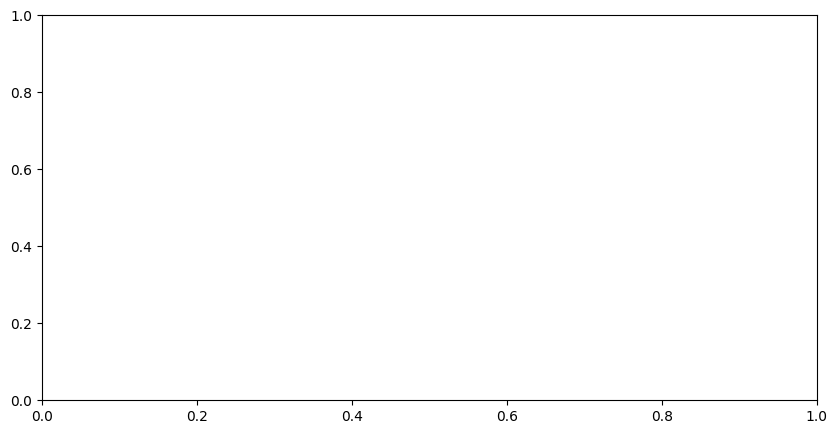

In [1]:
from GenZ import decode_moddeling, prefill_moddeling

from GenZ.system import System
import pandas as pd
from GenZ.analye_model import *

model = 'llama_7b'
# configs
# batch_size = 96
batch_size = 120
input_tokens = 128
output_tokens = 1024


In [2]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 reset_batch_size=False,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='H100_GPU',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)

,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,48823.66464,649.510742,386.0,386.0,121.875,0.186115,186115.012449


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 120 12288 1 4096],115.488722,12079.595520,0.937500,96.000000,2.812500,99.750000,0.012214,0.028651,M,0.426307,28650.620404,3.882934,421.617241,12213.948959,28650.620404,0.028651,1
1,Logit,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,4.714586,3.617126,127.228635,34787.047143,0.034787,1
2,Logit,[ 120 32 1 1024 128],0.991288,1006.632960,0.937500,960.000000,7.500000,968.437500,0.001018,0.276411,M,0.003682,276411.467907,37.461232,3.641792,1017.829080,276411.467907,0.276411,1
3,Attend,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000127,0.034787,M,0.003657,34787.047143,4.714586,3.617126,127.228635,34787.047143,0.034787,1
4,Attend,[ 120 32 1 1024 128],0.991288,1006.632960,7.500000,960.000000,0.937500,968.437500,0.001018,0.276411,M,0.003682,276411.467907,37.461232,3.641792,1017.829080,276411.467907,0.276411,1
5,GEMM,[ 120 4096 1 4096],113.357934,4026.531840,0.937500,32.000000,0.937500,33.875000,0.004071,0.009730,M,0.418441,9729.721967,1.318641,413.838325,4071.316320,9729.721967,0.009730,1
6,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1
7,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1
8,GEMM,[ 120 4096 1 11008],115.362648,10821.304320,2.519531,86.000000,0.937500,89.457031,0.010942,0.025694,M,0.425841,25694.230024,3.482263,421.156980,10941.662609,25694.230024,0.025694,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,50834.96448,2582.62109,386.00000,386.00000,968.43750,0.73786,737860.06254


Decode Latency:14.783601199879367 msec
single_pipe_stage:14.783601199879367 msec; single_layer_time:0.4619875374962302 msec
Layers per pipeline stage:32
Error = 59.71427855867312 in latency calc. Avg Decode Latency:14.783601199879367 msec , Latency based on last token : 23.611522001378674 msec
Attn time:19.916704963235293; Linear time:3.6948170381433822; AR time:0; Pipeline Comm time:0.0


/workspace/weixuechao/GenZ-LLM-Analyzer/GenZ/LLM_inference/llm_decode.py:296: UserWarning: Error in latency calc. Avg Decode Latency:14.783601199879367 msec , Latency based on last token : 23.611522001378674 msec, 
 Attn time:19.916704963235293; Linear time:3.6948170381433822; AR time:0; Pipeline Comm time:0.0
  warnings.warn(f"Error in latency calc. Avg Decode Latency:{decode_latency} msec , Latency based on last token : {total_time} msec, \n Attn time:{attn_time}; Linear time:{linear_time}; AR time:{all_reduce_delay * (get_num_layers_per_pipeline_stage(num_layers, pipeline_parallel))}; Pipeline Comm time:{single_stage_pipe_delay * (pipeline_parallel-1)}")


{'Latency': np.float64(14.783601199879367),
 'Throughput': np.float64(8117.1020766563415),
 'AI_total': np.float64(30.833714148635085),
 'Batch': 120,
 'Runtime_breakdown': [np.float64(3.6948170381433822),
  np.float64(19.916704963235293),
  0.0],
 'is_offload': False}

In [3]:
decode_moddeling(model=model,
                 batch_size=batch_size,
                 Bb=1,
                 input_tokens=input_tokens,
                 output_tokens=output_tokens,
                 model_profilling=False,
                 system_name='SPR_HBM3e',
                 bits='bf16',
                 tensor_parallel=1,
                 pipeline_parallel=1,
                 debug=True,
                 time_breakdown=True)

,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,48823.66464,649.51074,386.00000,386.00000,121.87500,0.40936,409355.19005


,Op Type,Dimension,Op Intensity,Num ops (MFLOP),Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Compute time (msec),Memory time (msec),Bound,C/M ratio,Cycles,% of total time,Throughput (Tflops),Compute cycle,Memory cycle,Latency (msec),C Effcy
0,GEMM,[ 120 12288 1 4096],115.488722,12079.595520,0.937500,96.000000,2.812500,99.750000,0.084237,0.028651,C,2.940148,84237.067782,8.764650,143.400000,84237.067782,28650.620404,0.084237,1
1,Logit,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000877,0.034787,M,0.025224,34787.047143,3.619502,3.617126,877.469456,34787.047143,0.034787,1
2,Logit,[ 120 32 1 1024 128],0.991288,1006.632960,0.937500,960.000000,7.500000,968.437500,0.007020,0.276411,M,0.025396,276411.467907,28.759900,3.641792,7019.755649,276411.467907,0.276411,1
3,Attend,[120 32 1 128 128],0.984615,125.829120,0.937500,120.000000,0.937500,121.875000,0.000877,0.034787,M,0.025224,34787.047143,3.619502,3.617126,877.469456,34787.047143,0.034787,1
4,Attend,[ 120 32 1 1024 128],0.991288,1006.632960,7.500000,960.000000,0.937500,968.437500,0.007020,0.276411,M,0.025396,276411.467907,28.759900,3.641792,7019.755649,276411.467907,0.276411,1
5,GEMM,[ 120 4096 1 4096],113.357934,4026.531840,0.937500,32.000000,0.937500,33.875000,0.028079,0.009730,C,2.885902,28079.022594,2.921550,143.400000,28079.022594,9729.721967,0.028079,1
6,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.075462,0.025694,C,2.936938,75462.373222,7.851665,143.400000,75462.373222,25694.230024,0.075462,1
7,GEMM,[ 120 11008 1 4096],115.362648,10821.304320,0.937500,86.000000,2.519531,89.457031,0.075462,0.025694,C,2.936938,75462.373222,7.851665,143.400000,75462.373222,25694.230024,0.075462,1
8,GEMM,[ 120 4096 1 11008],115.362648,10821.304320,2.519531,86.000000,0.937500,89.457031,0.075462,0.025694,C,2.936938,75462.373222,7.851665,143.400000,75462.373222,25694.230024,0.075462,1


,MACs (MFLOP),Total Data (MB),Total Weights (MB),Parameters (MB),On-chip Memory Footprint (MB),Latency (msec),Cycles
0,50834.96448,2582.62109,386.00000,386.00000,968.43750,0.96110,961100.24014


Decode Latency:21.927286883074895 msec
single_pipe_stage:21.927286883074895 msec; single_layer_time:0.6852277150960905 msec
Layers per pipeline stage:32
Error = 40.259977664237844 in latency calc. Avg Decode Latency:21.927286883074895 msec , Latency based on last token : 30.755207684574202 msec
Attn time:19.916704963235293; Linear time:10.83850272133891; AR time:0; Pipeline Comm time:0.0


{'Latency': np.float64(21.927286883074895),
 'Throughput': np.float64(5472.63328289944),
 'AI_total': np.float64(30.833714148635085),
 'Batch': 120,
 'Runtime_breakdown': [np.float64(10.83850272133891),
  np.float64(19.916704963235293),
  0.0],
 'is_offload': False}